# ChessVision Example

This notebook demonstrates the end-to-end process of detecting a chess position from an image using the ChessVision pipeline.

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import io
from pathlib import Path

import cairosvg
import chess
import chess.svg
import cv2
import matplotlib.pyplot as plt

from chessvision.predict.classify_raw import classify_raw
from chessvision.utils import DATA_ROOT


In [25]:
# Read the test image
test_image_path = Path(DATA_ROOT) / "test" / "raw" / "3cb7e9ca-0549-4072-a0ef-ae5ea82174e6.JPG"
img = cv2.imread(str(test_image_path))


## Process the Image with ChessVision Pipeline

In [27]:
# Process the image using the ChessVision pipeline
board_img, mask, predictions, chessboard, fen, squares, names = classify_raw(img, filename=test_image_path.name)

print(fen)


3rrk2/2Pp1P1R/7P/2b2N2/p2pp3/7p/K1Q5/8


## Visualize the Detected Chess Position

In [28]:
# Function to display multiple images in a row with different sizes
def display_comparison(original_img, mask, board_img, fen, figsize=(20, 5)):
    fig, axes = plt.subplots(1, 4, figsize=figsize)

    # Original image
    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Segmentation mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')

    # Extracted board
    axes[2].imshow(board_img, cmap='gray')
    axes[2].set_title('Extracted Board')
    axes[2].axis('off')

    # Chess position
    if fen:
        board = chess.Board(fen)
        svg_board = chess.svg.board(board, size=300)
        axes[3].axis('off')
        axes[3].set_title('Detected Position')

        # Convert SVG to a format matplotlib can display
        svg_img = cairosvg.svg2png(bytestring=svg_board.encode())
        chess_img = plt.imread(io.BytesIO(svg_img))
        axes[3].imshow(chess_img)
    else:
        axes[3].text(0.5, 0.5, 'No valid FEN detected', 
                    horizontalalignment='center', verticalalignment='center')
        axes[3].axis('off')

    plt.tight_layout()
    plt.show()

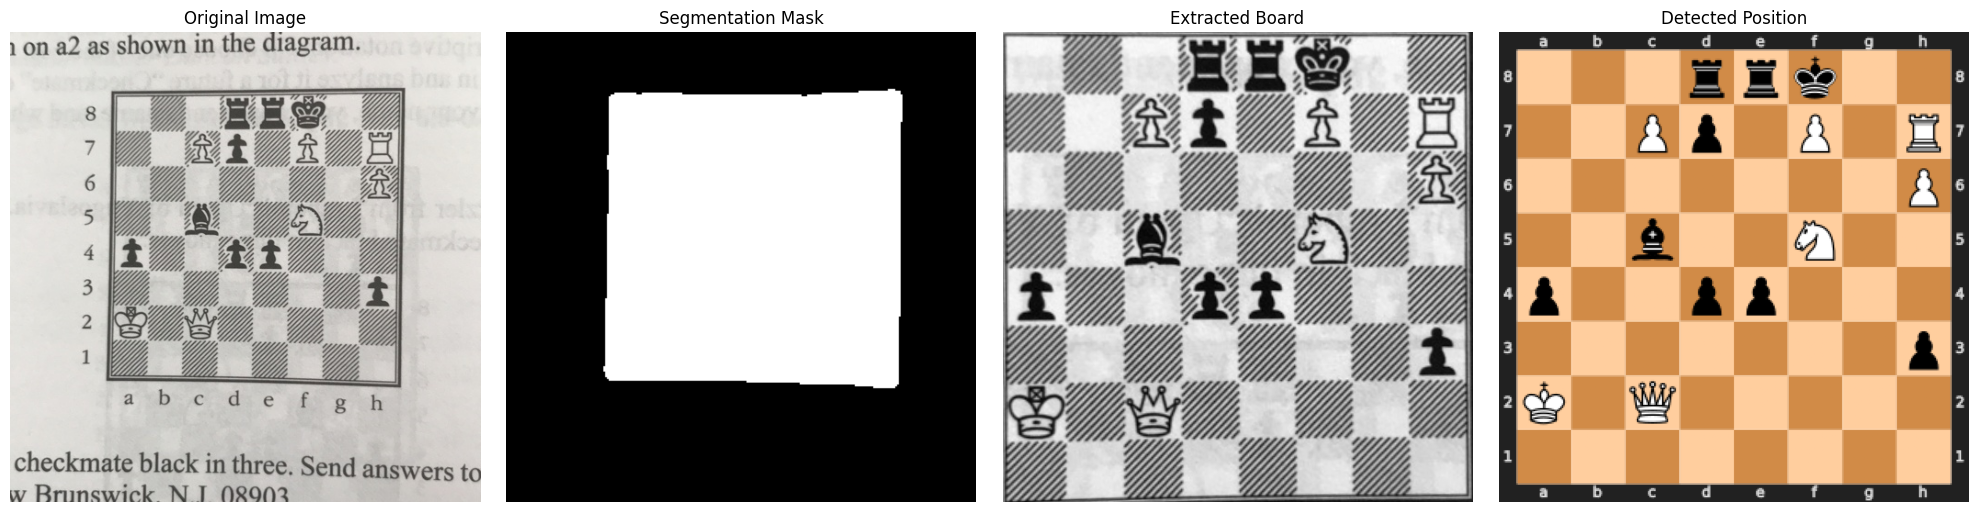

In [29]:
# Display the full comparison if all components are available
if board_img is not None and chessboard is not None:
    display_comparison(img, mask, board_img, fen)